In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# os.chdir(r'C:\Users\newbi\project-local\WM0824TU-economics-of-cybersecurity-DDoS')

'C:\\Users\\newbi\\project-local\\WM0824TU-economics-of-cybersecurity-DDoS'

In [12]:
# data source: https://surfdrive.surf.nl/files/index.php/s/CZWfWQp3VKGKa8m
df = pd.read_csv('SecurityMetrics/data_with_ports.csv.gz', sep='|', compression='gzip')

C:\Users\newbi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (15,17,19,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
# parse string to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['start_time'] = pd.to_datetime(df['start_time'], format='%Y-%m-%dT%H:%M:%S+09:00')
df['stop_time'] = pd.to_datetime(df['stop_time'], format='%Y-%m-%dT%H:%M:%S+09:00')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5721432 entries, 0 to 5721431
Data columns (total 35 columns):
target_ip                 object
date                      datetime64[ns]
sensor_id                 object
service                   object
start_time                datetime64[ns]
stop_time                 datetime64[ns]
duration                  float64
packets                   int64
raw_country               object
raw_as                    object
raw_hostname              object
udp_port_list             object
pyasn_as                  float64
pyasn_as_bgp_size         float64
cc                        object
region                    object
is_oecd                   float64
as_type                   object
as_type_confidence        float64
tg_op                     object
org                       object
org_range                 object
org_rangesize             float64
org_ipsize_seen           float64
org_domainsize_seen       float64
org_ipsize_seen_shared    float

In [15]:
df.head()

,target_ip,date,sensor_id,service,start_time,stop_time,duration,packets,raw_country,raw_as,...,org_ipsize_seen_shared,org_is_hosting,org_tag,caida_type,dc,subs,as_ipsize_seen,as_domainsize_seen,pps,year
0,1.0.131.184,2014-08-02,sensor001,dns,2014-08-02 22:32:18,2014-08-02 22:37:15,297.0,609,Thailand,AS9737 TOT Public Company Limited,...,591.0,1.0,NaN,Transit/Access,0,1593000.0,405292.0,1408.0,2.050505,2014
1,1.0.131.184,2014-08-02,sensor003,dns,2014-08-02 22:32:20,2014-08-02 22:37:18,298.0,602,Thailand,AS9737 TOT Public Company Limited,...,591.0,1.0,NaN,Transit/Access,0,1593000.0,405292.0,1408.0,2.020134,2014
2,1.1.0.1,2014-07-01,sensor007,chg,2014-07-01 16:20:55,2014-07-01 16:21:24,29.0,494,China,None,...,2315.0,0.0,other,NaN,0,NaN,NaN,NaN,17.034483,2014
3,1.1.1.1,2014-01-10,sensor001,chg,2014-01-10 23:50:48,2014-01-10 23:56:46,358.0,331,Australia,AS15169 Google Inc.,...,6502.0,1.0,NaN,Content,2416,NaN,84522.0,4105765.0,0.924581,2014
4,1.1.1.1,2014-01-11,sensor001,chg,2014-01-11 01:11:09,2014-01-11 01:14:17,188.0,576,Australia,AS15169 Google Inc.,...,6502.0,1.0,NaN,Content,2416,NaN,84522.0,4105765.0,3.063830,2014


In [16]:
df.iloc[1]

target_ip                                                       1.0.131.184
date                                                    2014-08-02 00:00:00
sensor_id                                                         sensor003
service                                                                 dns
start_time                                              2014-08-02 22:32:20
stop_time                                               2014-08-02 22:37:18
duration                                                                298
packets                                                                 602
raw_country                                                        Thailand
raw_as                                    AS9737 TOT Public Company Limited
raw_hostname                             node-qg.pool-1-0.dynamic.totbb.net
udp_port_list                                                          [80]
pyasn_as                                                              23969
pyasn_as_bgp

# Analysis on Hosting Providers

In [33]:
df_host = df[df["as_type"] == "hosting"]
count_attacks = df_host["org"].value_counts()
orgs = df_host[["org","org_domainsize_seen"]]
orgs = orgs.drop_duplicates()
count_attacks = pd.DataFrame(count_attacks)
orgs_attacks = orgs.merge(count_attacks, left_on = "org", right_index=True)
orgs_attacks.head()

,org,org_x,org_domainsize_seen,org_y
2948,SoftLayer Technologies,SoftLayer Technologies,541501.0,6483
2967,XO Communications,XO Communications,46895.0,325
6753,Wharf T&T,Wharf T&T,26689.0,289
9825,Wharf T&T Net,Wharf T&T Net,186.0,6
10438,Clairvoyace co Ltd,Clairvoyace co Ltd,9579.0,7


In [34]:
orgs_attacks["normalized"] = orgs_attacks["org_y"] / orgs_attacks["org_domainsize_seen"]
orgs_attacks.head()

,org,org_x,org_domainsize_seen,org_y,normalized
2948,SoftLayer Technologies,SoftLayer Technologies,541501.0,6483,0.011972
2967,XO Communications,XO Communications,46895.0,325,0.006930
6753,Wharf T&T,Wharf T&T,26689.0,289,0.010828
9825,Wharf T&T Net,Wharf T&T Net,186.0,6,0.032258
10438,Clairvoyace co Ltd,Clairvoyace co Ltd,9579.0,7,0.000731


In [35]:
top20_orgs = orgs_attacks.sort_values(by = "normalized", ascending = False).iloc[:20]
top20_orgs

,org,org_x,org_domainsize_seen,org_y,normalized
768548,RitmoHost LLC,RitmoHost LLC,1.0,801,801.000000
4371774,Smtp2go.com,Smtp2go.com,1.0,279,279.000000
663652,HeLLsGamers.com,HeLLsGamers.com,1.0,107,107.000000
434533,Chatango LLC,Chatango LLC,1.0,102,102.000000
2866067,Access range,Access range,1.0,67,67.000000
344897,bbmp3.com,bbmp3.com,1.0,49,49.000000
596782,Facepunch Studios LTD,Facepunch Studios LTD,2.0,89,44.500000
4151924,Amazon Technologies,Amazon Technologies,28.0,1029,36.750000
203963,CLOUDNAP,CLOUDNAP,10.0,332,33.200000
1187836,USC US-China Institute,USC US-China Institute,1.0,31,31.000000


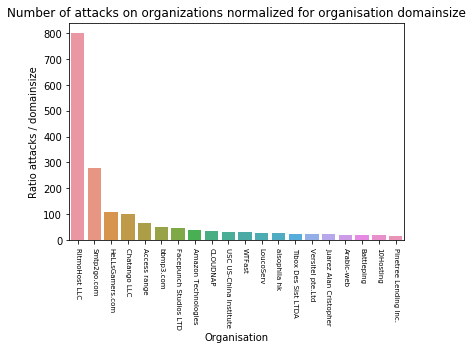

In [36]:
ax = sns.barplot(x="org", y="normalized", data=top20_orgs)
ax.set_xticklabels(top20_orgs["org"], rotation = -90, fontsize = 7)
ax.set_ylabel("Ratio attacks / domainsize")
ax.set_title("Number of attacks on organizations normalized for organisation domainsize")
ax.set_xlabel("Organisation")

ax.figure.savefig("normalized_attacks_org.png")

In [81]:
df_pps_attacks = df_host.merge(orgs_attacks, on = "org")
df_pps_attacks.head()

Text(0,0.5,'Packets per seconds')

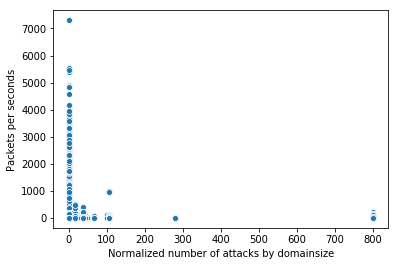

In [89]:
ax = sns.scatterplot(x="normalized", y="pps", data=df_pps_attacks)
ax.set_xlabel("Normalized number of attacks by domainsize")
ax.set_ylabel("Packets per seconds")
# ax.set_xscale('log')
# ax.set_yscale('log')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [88]:
top20 = top20_orgs["org"].values
df_pps_attacks_top20 = df_host.loc[df_host["org"].isin(top20)]
df_pps_attacks_top20 = df_pps_attacks_top20.merge(orgs_attacks, on="org")
df_pps_attacks_top20 = df_pps_attacks_top20.sort_values(by="normalized", ascending=False)

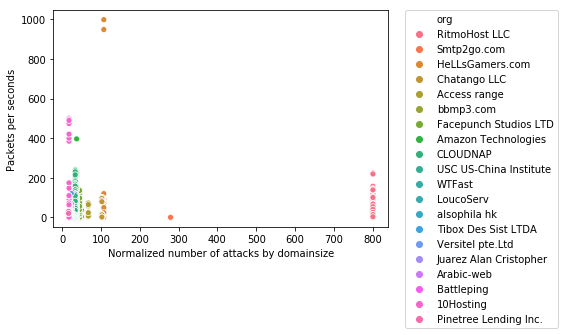

In [97]:
ax = sns.scatterplot(x="normalized", y="pps", hue="org", data=df_pps_attacks_top20)
ax.set_xlabel("Normalized number of attacks by domainsize")
ax.set_ylabel("Packets per seconds")
# ax.set_xscale('log')
# ax.set_yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

ax.figure.savefig("normalized_attacks_with_pps.png")